In [52]:
import pandas as pd

In [53]:
df1=pd.read_csv("insurance.csv")

In [54]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
# df.columns
# df['sex'].replace({"female":1})
df=df1.drop(columns=['region'])

In [56]:
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   sex_male    1338 non-null   bool   
 5   smoker_yes  1338 non-null   bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 44.6 KB


In [58]:
# df['region'].unique()
df=df.astype({"smoker_yes":"int"})
df=df.astype({"sex_male":"int"})

In [59]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

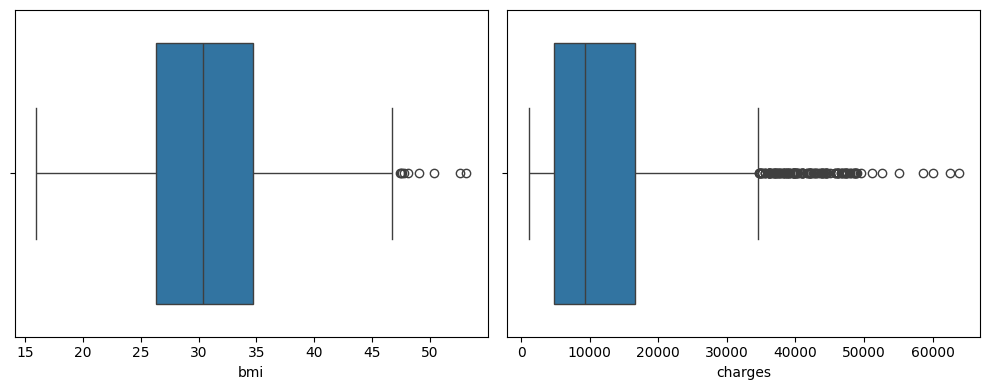

In [61]:
fig,a=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(df,x="charges",ax=a[1])
sns.boxplot(df,x="bmi",ax=a[0])
plt.tight_layout()
plt.show()

In [62]:
df['zscore_bmi']=(df['bmi']-df["bmi"].mean())/df["bmi"].std()
df

,age,bmi,children,charges,sex_male,smoker_yes,zscore_bmi
0,19,27.900,0,16884.92400,0,1,-0.453151
1,18,33.770,1,1725.55230,1,0,0.509431
2,28,33.000,3,4449.46200,1,0,0.383164
3,33,22.705,0,21984.47061,1,0,-1.305043
4,32,28.880,0,3866.85520,1,0,-0.292447
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0.050278
1334,18,31.920,0,2205.98080,0,0,0.206062
1335,18,36.850,0,1629.83350,0,0,1.014499
1336,21,25.800,0,2007.94500,0,0,-0.797515


In [63]:
df=df[df["zscore_bmi"].abs()<2]


In [64]:
df['zscore_charges']=(df['charges']-df["charges"].mean())/df["charges"].std()
df

C:\Users\tscha\AppData\Local\Temp\ipykernel_20336\2816787351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore_charges']=(df['charges']-df["charges"].mean())/df["charges"].std()


,age,bmi,children,charges,sex_male,smoker_yes,zscore_bmi,zscore_charges
0,19,27.900,0,16884.92400,0,1,-0.453151,0.302465
1,18,33.770,1,1725.55230,1,0,0.509431,-0.962793
2,28,33.000,3,4449.46200,1,0,0.383164,-0.735445
3,33,22.705,0,21984.47061,1,0,-1.305043,0.728092
4,32,28.880,0,3866.85520,1,0,-0.292447,-0.784072
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0.050278,-0.222052
1334,18,31.920,0,2205.98080,0,0,0.206062,-0.922694
1335,18,36.850,0,1629.83350,0,0,1.014499,-0.970782
1336,21,25.800,0,2007.94500,0,0,-0.797515,-0.939223


In [65]:
df['zscore_charges'].max()

np.float64(4.1174217450970945)

In [101]:
df=df[df["zscore_charges"].abs()<0.8]
df

,age,bmi,children,charges,sex_male,smoker_yes,zscore_bmi,zscore_charges
0,19,27.900,0,16884.92400,0,1,-0.453151,0.302465
2,28,33.000,3,4449.46200,1,0,0.383164,-0.735445
3,33,22.705,0,21984.47061,1,0,-1.305043,0.728092
4,32,28.880,0,3866.85520,1,0,-0.292447,-0.784072
5,31,25.740,0,3756.62160,0,0,-0.807354,-0.793272
...,...,...,...,...,...,...,...,...
1328,23,24.225,2,22395.74424,0,0,-1.055789,0.762419
1329,52,38.600,2,10325.20600,1,0,1.301469,-0.245033
1330,57,25.740,2,12629.16560,0,0,-0.807354,-0.052736
1331,23,33.400,0,10795.93733,0,0,0.448757,-0.205744


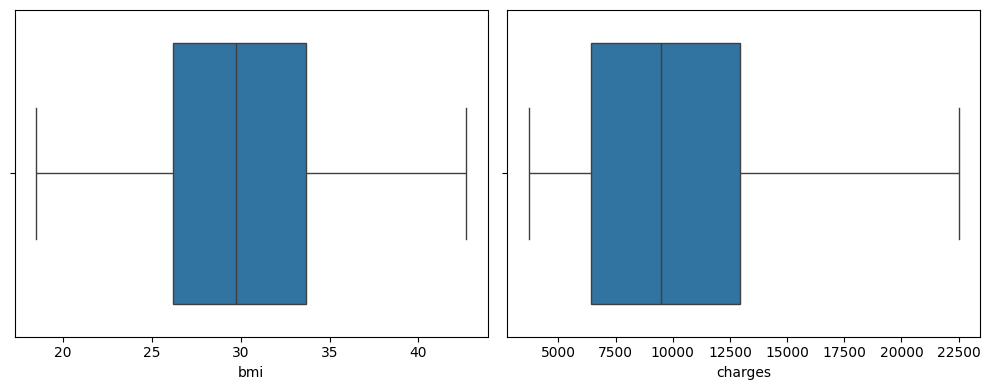

In [102]:
fig,a=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(df,x="charges",ax=a[1])
sns.boxplot(df,x="bmi",ax=a[0])
plt.tight_layout()
plt.show()

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

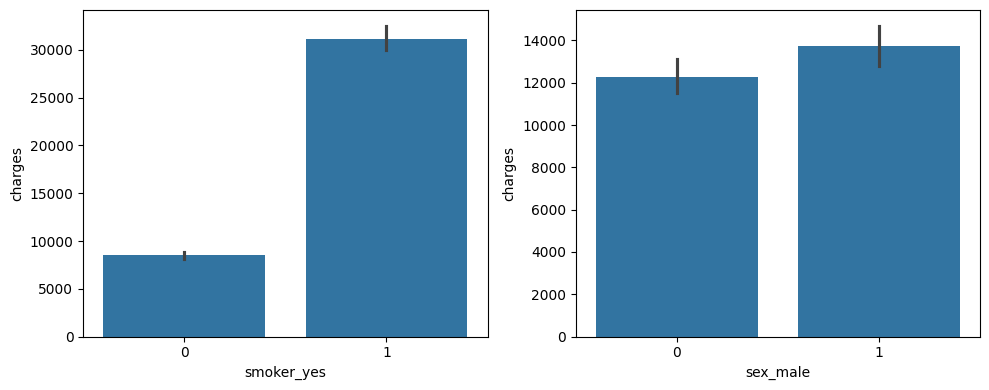

In [69]:
fig,axa=plt.subplots(1,2,figsize=(10,4))
sns.barplot(df,x='smoker_yes',y="charges",ax=axa[0])
sns.barplot(df,x='sex_male',y="charges",ax=axa[1])
plt.tight_layout()
plt.show()

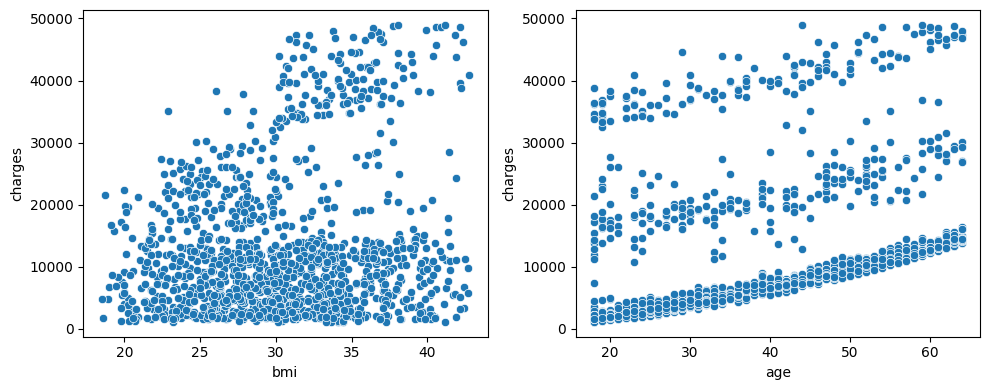

In [70]:
fig,a=plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(df,x="age",y="charges",ax=a[1])
sns.scatterplot(df,x="bmi",y="charges",ax=a[0])
plt.tight_layout()
plt.show()

<Axes: xlabel='children', ylabel='charges'>

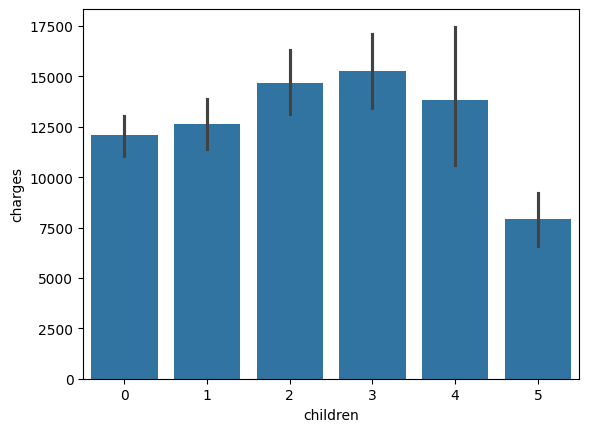

In [71]:
sns.barplot(df,x='children',y="charges")

In [72]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,zscore_bmi,zscore_charges
age,1.000000,0.104862,0.043083,0.310321,-0.016382,-0.023328,0.104862,0.310321
bmi,0.104862,1.000000,-0.004514,0.192863,0.034001,-0.004686,1.000000,0.192863
children,0.043083,-0.004514,1.000000,0.072969,0.022864,-0.000537,-0.004514,0.072969
charges,0.310321,0.192863,0.072969,1.000000,0.063305,0.782421,0.192863,1.000000
sex_male,-0.016382,0.034001,0.022864,0.063305,1.000000,0.082530,0.034001,0.063305
smoker_yes,-0.023328,-0.004686,-0.000537,0.782421,0.082530,1.000000,-0.004686,0.782421
zscore_bmi,0.104862,1.000000,-0.004514,0.192863,0.034001,-0.004686,1.000000,0.192863
zscore_charges,0.310321,0.192863,0.072969,1.000000,0.063305,0.782421,0.192863,1.000000


In [73]:
df.corr()['charges']

age               0.310321
bmi               0.192863
children          0.072969
charges           1.000000
sex_male          0.063305
smoker_yes        0.782421
zscore_bmi        0.192863
zscore_charges    1.000000
Name: charges, dtype: float64

here charges and smoker_yes are having  linear relationship and also charges and age are having modarate relationship 
so we can use linear regression algorithm

In [74]:
x= df.drop('charges', axis=1)
y=df['charges']

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [77]:
m=LinearRegression()

In [78]:
m.fit(xtrain,ytrain)

LinearRegression()

In [79]:
m.intercept_

np.float64(13261.013258625295)

In [80]:
y_perd=m.predict(xtest)
y_p=m.predict(xtrain)

In [81]:
m.score(xtrain,ytrain)

1.0

In [82]:
m.score(xtest,ytest)

1.0

In [83]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [84]:
r2_score(ytrain,y_p)

1.0

In [85]:
r2_score(ytest,y_perd)

1.0

In [86]:
mean_squared_error(ytest,y_perd)

6.901056748820185e-21

In [87]:
r=root_mean_squared_error(ytest,y_perd)

In [88]:
import numpy as np

In [89]:
t_m=np.mean(ytest)

In [90]:
me=r/t_m

In [91]:
me

np.float64(6.242495930740323e-15)